# Task 4: Hand in Exercise ANN Modelling and Model Performance Evaluation

    Based on this lecture, you are going to do Task 4: ANN modeling

    
   Your task #1: Synthetic Data based modeling to learn step by step how the ANN modeling and evaluation works
       
       a) Use balisticwithout wind data. The Projectile motion time of flight and range data has been generated by random 
       Inital velocity and intial angle. Therfore, using Input features (V0 and ang), and Target (Time, or R) peform ANN 
        modelling and Check if ANN perfectly discovred the physics (i.e, using 70% data for training, check if the model 
        predict the test 30% perfectly). In short, run two modeling 
            I ) Input features (V0 and ang), and Target (Time) 
           II ) Input features (V0 and ang), and Target (R) 
   
   
   Your task #2: Your Project task #4: Using Cleaned dataset: to be handed in: 
          
       b) Use Cleaned project file, your task is to model Vp as a target, and the rest logs as input feature
           
           Input features a combination of (DEN, NEU, Vs), and Target (Vp) 
           
           Which combination of Input features provided good model with the Target (Vp)? 
   
                  
 
 How the ANN modeling and Performance analysis work? 
       
       We will learn during lecture hr. The note is uploaded as lecture #4
       
       When you do your project works, feel free to contact me at my office or in the lab
       

In [3]:
###==========================================================================================================================###
#Please take time to read the following guide written in this box. 
#Here, you will get the brief information about the modelling
#The ANN modelling will be performed with keras/Python built in library
#if incase you dont have the tensor flow, you need to install by the following options

# Installing required libraries
#!pip install tensorflow
#!pip install keras

###==========================================================================================================================###
# Here we will perfrom ANN after standarizing the dataset
#How do you standardize a data set in Python?
#Ways to Standardize Data in Python
     #Using preprocessing. scale() function. 
     #Using StandardScaler() function. 
     #Python sklearn library offers us with StandardScaler() function to perform standardization on the dataset. 
# It is reported that Standardization of the dataset
    #Data scaling is a recommended pre-processing step when working with deep learning neural networks.
    #Data scaling can be achieved by normalizing or standardizing real-valued input and output variables.
    #How to apply standardization and normalization to improve the performance of a Multilayer Perceptron model on 
    #a regression predictive modeling problem.
###==========================================================================================================================###
    
# Read this and the ANN modelling code is summariazed as the following 

# Step 1 Data pre-processing
    # File loading 
    # Target and predictor variables separation 
    # Standardization via python StandardScaler() function. 
    # Splitting data into traning and test set 
    
# Step 2 ANN modelling  
 #2-1 CREATING ANN MODEL 
  #2.1.1 Defining the Input layer and FIRST hidden layer!
  #2-1.2 Defining the Second layer of the model
  #2-1.3 The output neuron is a single fully connected node 
# 2-2 COMPILING THE MODEL 
# 2-3 FITTING THE ANN ANN to the Training set

# Step 3 Model prediction
   #Perform inverse transformation
   # Pediction and compare with measured data

# Step 4 Model performance analysis 
  # Here statistical analysis will be performed to evaluate the model accuracy of the prediction
###==========================================================================================================================###



# Install Tensorflow and keras

In [24]:
# Installing required libraries
!pip install tensorflow
!pip install keras


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Import data

In [25]:
# Reading the cleaned numeric logdata
import pandas as pd
import numpy as np

CleanedData =pd.read_excel('CleanOutlier1.xlsx')
CleanedData.head()


,Vs,DEN,NEU,Vp
0,1.676857,2.3767,0.2759,3.045533
1,1.677172,2.2101,0.2524,2.974779
2,1.676252,2.1419,0.2591,2.881411
3,1.677030,2.1660,0.2589,2.930981
4,1.684534,2.1193,0.2596,2.910094


# Standardize and Split (Training/Test)

In [27]:
# Separate Target Variable and Predictor Variables

# Task 1: Synthetic Data (Projectile without wind, target are either time, or range (R), Features are V0 and ang)
#TargetVariable=['Time']
TargetVariable=['Vp']
Predictors=['Vs', 'DEN', 'NEU']
X=CleanedData[Predictors].values
y=CleanedData[TargetVariable].values


# Task 2: Your project Later you will use your project cleaned here (Any combinaion of input features)
#TargetVariable=['Vp']
#Predictors=['Vs', 'DEN', 'NEU']
#X=CleanedData[Predictors].values
#y=CleanedData[TargetVariable].values


# Let us do standarziation and data splitting......

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#CleanedData[TargetVariable].values
#CleanedData[TargetVariable].values

(741, 3)
(741, 1)
(318, 3)
(318, 1)


In [28]:


import numpy as np
 
print("My numpy version is: ", np.__version__)

My numpy version is:  1.26.1


# ANN Modeling Step by Step

In [29]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense


# ============Create ANN model========================
model = Sequential()


# Defining the Input layer and FIRST hidden layer, both are same! Dense allow nodes to be fully connected
model.add(Dense(units=5, input_dim=3, kernel_initializer='normal', activation='relu'))


# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically

model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

#======================# The output neuron is a single fully connected node =======================
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))



# ==================Compiling the model======================================
model.compile(loss='mean_squared_error', optimizer='RMSprop')#adam kan også brukes

# =================Fitting the ANN to the Training set======================

model.fit(X_train, y_train ,batch_size = 20, epochs = 1500, verbose=1) # vebrose =1, allows to visualise the iteration. =0, not
 

#==================For Logging modeling loss history ========================

history = model.fit(X_train, y_train ,batch_size = 20, epochs = 1500, verbose=1)


Epoch 1/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.8475
Epoch 2/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.8259
Epoch 3/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7865
Epoch 4/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7294
Epoch 5/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.6560
Epoch 6/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.5655
Epoch 7/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.4579
Epoch 8/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.3432
Epoch 9/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.2288
Epoch 10/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.1328
Epoch 11/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0745
Epoch 12/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0502
Epoch 13/1500
38/38 [====

38/38 [==============================] - 0s 986us/step - loss: 0.0215
Epoch 101/1500
38/38 [==============================] - 0s 936us/step - loss: 0.0215
Epoch 102/1500
38/38 [==============================] - 0s 877us/step - loss: 0.0216
Epoch 103/1500
38/38 [==============================] - 0s 804us/step - loss: 0.0215
Epoch 104/1500
38/38 [==============================] - 0s 781us/step - loss: 0.0215
Epoch 105/1500
38/38 [==============================] - 0s 789us/step - loss: 0.0215
Epoch 106/1500
38/38 [==============================] - 0s 842us/step - loss: 0.0214
Epoch 107/1500
38/38 [==============================] - 0s 835us/step - loss: 0.0215
Epoch 108/1500
38/38 [==============================] - 0s 823us/step - loss: 0.0215
Epoch 109/1500
38/38 [==============================] - 0s 832us/step - loss: 0.0216
Epoch 110/1500
38/38 [==============================] - 0s 814us/step - loss: 0.0215
Epoch 111/1500
38/38 [==============================] - 0s 780us/step - loss: 0.

38/38 [==============================] - 0s 881us/step - loss: 0.0211
Epoch 197/1500
38/38 [==============================] - 0s 764us/step - loss: 0.0211
Epoch 198/1500
38/38 [==============================] - 0s 774us/step - loss: 0.0211
Epoch 199/1500
38/38 [==============================] - 0s 771us/step - loss: 0.0214
Epoch 200/1500
38/38 [==============================] - 0s 808us/step - loss: 0.0212
Epoch 201/1500
38/38 [==============================] - 0s 811us/step - loss: 0.0212
Epoch 202/1500
38/38 [==============================] - 0s 799us/step - loss: 0.0211
Epoch 203/1500
38/38 [==============================] - 0s 780us/step - loss: 0.0212
Epoch 204/1500
38/38 [==============================] - 0s 821us/step - loss: 0.0212
Epoch 205/1500
38/38 [==============================] - 0s 778us/step - loss: 0.0210
Epoch 206/1500
38/38 [==============================] - 0s 883us/step - loss: 0.0213
Epoch 207/1500
38/38 [==============================] - 0s 861us/step - loss: 0.

38/38 [==============================] - 0s 812us/step - loss: 0.0202
Epoch 293/1500
38/38 [==============================] - 0s 849us/step - loss: 0.0201
Epoch 294/1500
38/38 [==============================] - 0s 873us/step - loss: 0.0202
Epoch 295/1500
38/38 [==============================] - 0s 850us/step - loss: 0.0202
Epoch 296/1500
38/38 [==============================] - 0s 868us/step - loss: 0.0201
Epoch 297/1500
38/38 [==============================] - 0s 924us/step - loss: 0.0202
Epoch 298/1500
38/38 [==============================] - 0s 862us/step - loss: 0.0201
Epoch 299/1500
38/38 [==============================] - 0s 846us/step - loss: 0.0202
Epoch 300/1500
38/38 [==============================] - 0s 816us/step - loss: 0.0201
Epoch 301/1500
38/38 [==============================] - 0s 864us/step - loss: 0.0201
Epoch 302/1500
38/38 [==============================] - 0s 830us/step - loss: 0.0201
Epoch 303/1500
38/38 [==============================] - 0s 779us/step - loss: 0.

38/38 [==============================] - 0s 825us/step - loss: 0.0198
Epoch 390/1500
38/38 [==============================] - 0s 880us/step - loss: 0.0198
Epoch 391/1500
38/38 [==============================] - 0s 859us/step - loss: 0.0197
Epoch 392/1500
38/38 [==============================] - 0s 854us/step - loss: 0.0198
Epoch 393/1500
38/38 [==============================] - 0s 826us/step - loss: 0.0197
Epoch 394/1500
38/38 [==============================] - 0s 830us/step - loss: 0.0197
Epoch 395/1500
38/38 [==============================] - 0s 888us/step - loss: 0.0198
Epoch 396/1500
38/38 [==============================] - 0s 882us/step - loss: 0.0197
Epoch 397/1500
38/38 [==============================] - 0s 870us/step - loss: 0.0197
Epoch 398/1500
38/38 [==============================] - 0s 810us/step - loss: 0.0197
Epoch 399/1500
38/38 [==============================] - 0s 788us/step - loss: 0.0197
Epoch 400/1500
38/38 [==============================] - 0s 825us/step - loss: 0.

38/38 [==============================] - 0s 827us/step - loss: 0.0196
Epoch 486/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 487/1500
38/38 [==============================] - 0s 804us/step - loss: 0.0197
Epoch 488/1500
38/38 [==============================] - 0s 823us/step - loss: 0.0196
Epoch 489/1500
38/38 [==============================] - 0s 848us/step - loss: 0.0197
Epoch 490/1500
38/38 [==============================] - 0s 902us/step - loss: 0.0197
Epoch 491/1500
38/38 [==============================] - 0s 922us/step - loss: 0.0196
Epoch 492/1500
38/38 [==============================] - 0s 907us/step - loss: 0.0196
Epoch 493/1500
38/38 [==============================] - 0s 862us/step - loss: 0.0196
Epoch 494/1500
38/38 [==============================] - 0s 853us/step - loss: 0.0198
Epoch 495/1500
38/38 [==============================] - 0s 829us/step - loss: 0.0197
Epoch 496/1500
38/38 [==============================] - 0s 848us/step - loss: 0.01

38/38 [==============================] - 0s 896us/step - loss: 0.0194
Epoch 582/1500
38/38 [==============================] - 0s 939us/step - loss: 0.0197
Epoch 583/1500
38/38 [==============================] - 0s 903us/step - loss: 0.0196
Epoch 584/1500
38/38 [==============================] - 0s 804us/step - loss: 0.0197
Epoch 585/1500
38/38 [==============================] - 0s 773us/step - loss: 0.0197
Epoch 586/1500
38/38 [==============================] - 0s 821us/step - loss: 0.0194
Epoch 587/1500
38/38 [==============================] - 0s 845us/step - loss: 0.0197
Epoch 588/1500
38/38 [==============================] - 0s 832us/step - loss: 0.0196
Epoch 589/1500
38/38 [==============================] - 0s 844us/step - loss: 0.0195
Epoch 590/1500
38/38 [==============================] - 0s 892us/step - loss: 0.0196
Epoch 591/1500
38/38 [==============================] - 0s 816us/step - loss: 0.0197
Epoch 592/1500
38/38 [==============================] - 0s 771us/step - loss: 0.

38/38 [==============================] - 0s 885us/step - loss: 0.0196
Epoch 678/1500
38/38 [==============================] - 0s 930us/step - loss: 0.0195
Epoch 679/1500
38/38 [==============================] - 0s 871us/step - loss: 0.0198
Epoch 680/1500
38/38 [==============================] - 0s 850us/step - loss: 0.0195
Epoch 681/1500
38/38 [==============================] - 0s 838us/step - loss: 0.0195
Epoch 682/1500
38/38 [==============================] - 0s 833us/step - loss: 0.0195
Epoch 683/1500
38/38 [==============================] - 0s 839us/step - loss: 0.0196
Epoch 684/1500
38/38 [==============================] - 0s 845us/step - loss: 0.0197
Epoch 685/1500
38/38 [==============================] - 0s 824us/step - loss: 0.0196
Epoch 686/1500
38/38 [==============================] - 0s 829us/step - loss: 0.0195
Epoch 687/1500
38/38 [==============================] - 0s 856us/step - loss: 0.0196
Epoch 688/1500
38/38 [==============================] - 0s 846us/step - loss: 0.

38/38 [==============================] - 0s 797us/step - loss: 0.0196
Epoch 774/1500
38/38 [==============================] - 0s 873us/step - loss: 0.0196
Epoch 775/1500
38/38 [==============================] - 0s 895us/step - loss: 0.0196
Epoch 776/1500
38/38 [==============================] - 0s 921us/step - loss: 0.0195
Epoch 777/1500
38/38 [==============================] - 0s 909us/step - loss: 0.0195
Epoch 778/1500
38/38 [==============================] - 0s 801us/step - loss: 0.0196
Epoch 779/1500
38/38 [==============================] - 0s 775us/step - loss: 0.0196
Epoch 780/1500
38/38 [==============================] - 0s 815us/step - loss: 0.0196
Epoch 781/1500
38/38 [==============================] - 0s 814us/step - loss: 0.0195
Epoch 782/1500
38/38 [==============================] - 0s 870us/step - loss: 0.0196
Epoch 783/1500
38/38 [==============================] - 0s 854us/step - loss: 0.0196
Epoch 784/1500
38/38 [==============================] - 0s 841us/step - loss: 0.

38/38 [==============================] - 0s 806us/step - loss: 0.0195
Epoch 870/1500
38/38 [==============================] - 0s 842us/step - loss: 0.0196
Epoch 871/1500
38/38 [==============================] - 0s 869us/step - loss: 0.0196
Epoch 872/1500
38/38 [==============================] - 0s 857us/step - loss: 0.0195
Epoch 873/1500
38/38 [==============================] - 0s 833us/step - loss: 0.0196
Epoch 874/1500
38/38 [==============================] - 0s 818us/step - loss: 0.0195
Epoch 875/1500
38/38 [==============================] - 0s 859us/step - loss: 0.0196
Epoch 876/1500
38/38 [==============================] - 0s 845us/step - loss: 0.0195
Epoch 877/1500
38/38 [==============================] - 0s 834us/step - loss: 0.0196
Epoch 878/1500
38/38 [==============================] - 0s 815us/step - loss: 0.0196
Epoch 879/1500
38/38 [==============================] - 0s 822us/step - loss: 0.0196
Epoch 880/1500
38/38 [==============================] - 0s 975us/step - loss: 0.

38/38 [==============================] - 0s 785us/step - loss: 0.0195
Epoch 966/1500
38/38 [==============================] - 0s 823us/step - loss: 0.0194
Epoch 967/1500
38/38 [==============================] - 0s 833us/step - loss: 0.0196
Epoch 968/1500
38/38 [==============================] - 0s 841us/step - loss: 0.0195
Epoch 969/1500
38/38 [==============================] - 0s 816us/step - loss: 0.0196
Epoch 970/1500
38/38 [==============================] - 0s 840us/step - loss: 0.0196
Epoch 971/1500
38/38 [==============================] - 0s 848us/step - loss: 0.0196
Epoch 972/1500
38/38 [==============================] - 0s 922us/step - loss: 0.0197
Epoch 973/1500
38/38 [==============================] - 0s 954us/step - loss: 0.0196
Epoch 974/1500
38/38 [==============================] - 0s 875us/step - loss: 0.0196
Epoch 975/1500
38/38 [==============================] - 0s 876us/step - loss: 0.0195
Epoch 976/1500
38/38 [==============================] - 0s 890us/step - loss: 0.

38/38 [==============================] - 0s 957us/step - loss: 0.0195
Epoch 1061/1500
38/38 [==============================] - 0s 944us/step - loss: 0.0195
Epoch 1062/1500
38/38 [==============================] - 0s 993us/step - loss: 0.0196
Epoch 1063/1500
38/38 [==============================] - 0s 955us/step - loss: 0.0196
Epoch 1064/1500
38/38 [==============================] - 0s 783us/step - loss: 0.0196
Epoch 1065/1500
38/38 [==============================] - 0s 835us/step - loss: 0.0196
Epoch 1066/1500
38/38 [==============================] - 0s 827us/step - loss: 0.0196
Epoch 1067/1500
38/38 [==============================] - 0s 776us/step - loss: 0.0194
Epoch 1068/1500
38/38 [==============================] - 0s 769us/step - loss: 0.0197
Epoch 1069/1500
38/38 [==============================] - 0s 844us/step - loss: 0.0196
Epoch 1070/1500
38/38 [==============================] - 0s 847us/step - loss: 0.0195
Epoch 1071/1500
38/38 [==============================] - 0s 816us/step

38/38 [==============================] - 0s 816us/step - loss: 0.0195
Epoch 1156/1500
38/38 [==============================] - 0s 899us/step - loss: 0.0194
Epoch 1157/1500
38/38 [==============================] - 0s 855us/step - loss: 0.0195
Epoch 1158/1500
38/38 [==============================] - 0s 859us/step - loss: 0.0195
Epoch 1159/1500
38/38 [==============================] - 0s 881us/step - loss: 0.0196
Epoch 1160/1500
38/38 [==============================] - 0s 784us/step - loss: 0.0196
Epoch 1161/1500
38/38 [==============================] - 0s 781us/step - loss: 0.0196
Epoch 1162/1500
38/38 [==============================] - 0s 836us/step - loss: 0.0195
Epoch 1163/1500
38/38 [==============================] - 0s 833us/step - loss: 0.0195
Epoch 1164/1500
38/38 [==============================] - 0s 820us/step - loss: 0.0194
Epoch 1165/1500
38/38 [==============================] - 0s 820us/step - loss: 0.0195
Epoch 1166/1500
38/38 [==============================] - 0s 823us/step

38/38 [==============================] - 0s 824us/step - loss: 0.0195
Epoch 1251/1500
38/38 [==============================] - 0s 849us/step - loss: 0.0194
Epoch 1252/1500
38/38 [==============================] - 0s 848us/step - loss: 0.0194
Epoch 1253/1500
38/38 [==============================] - 0s 870us/step - loss: 0.0195
Epoch 1254/1500
38/38 [==============================] - 0s 852us/step - loss: 0.0195
Epoch 1255/1500
38/38 [==============================] - 0s 847us/step - loss: 0.0194
Epoch 1256/1500
38/38 [==============================] - 0s 842us/step - loss: 0.0195
Epoch 1257/1500
38/38 [==============================] - 0s 836us/step - loss: 0.0196
Epoch 1258/1500
38/38 [==============================] - 0s 813us/step - loss: 0.0195
Epoch 1259/1500
38/38 [==============================] - 0s 814us/step - loss: 0.0196
Epoch 1260/1500
38/38 [==============================] - 0s 836us/step - loss: 0.0196
Epoch 1261/1500
38/38 [==============================] - 0s 843us/step

38/38 [==============================] - 0s 809us/step - loss: 0.0195
Epoch 1346/1500
38/38 [==============================] - 0s 847us/step - loss: 0.0195
Epoch 1347/1500
38/38 [==============================] - 0s 842us/step - loss: 0.0196
Epoch 1348/1500
38/38 [==============================] - 0s 857us/step - loss: 0.0195
Epoch 1349/1500
38/38 [==============================] - 0s 832us/step - loss: 0.0194
Epoch 1350/1500
38/38 [==============================] - 0s 851us/step - loss: 0.0195
Epoch 1351/1500
38/38 [==============================] - 0s 934us/step - loss: 0.0195
Epoch 1352/1500
38/38 [==============================] - 0s 838us/step - loss: 0.0196
Epoch 1353/1500
38/38 [==============================] - 0s 862us/step - loss: 0.0195
Epoch 1354/1500
38/38 [==============================] - 0s 910us/step - loss: 0.0195
Epoch 1355/1500
38/38 [==============================] - 0s 957us/step - loss: 0.0194
Epoch 1356/1500
38/38 [==============================] - 0s 1ms/step -

38/38 [==============================] - 0s 847us/step - loss: 0.0194
Epoch 1441/1500
38/38 [==============================] - 0s 887us/step - loss: 0.0194
Epoch 1442/1500
38/38 [==============================] - 0s 872us/step - loss: 0.0195
Epoch 1443/1500
38/38 [==============================] - 0s 848us/step - loss: 0.0195
Epoch 1444/1500
38/38 [==============================] - 0s 845us/step - loss: 0.0195
Epoch 1445/1500
38/38 [==============================] - 0s 893us/step - loss: 0.0194
Epoch 1446/1500
38/38 [==============================] - 0s 873us/step - loss: 0.0194
Epoch 1447/1500
38/38 [==============================] - 0s 820us/step - loss: 0.0194
Epoch 1448/1500
38/38 [==============================] - 0s 775us/step - loss: 0.0196
Epoch 1449/1500
38/38 [==============================] - 0s 821us/step - loss: 0.0194
Epoch 1450/1500
38/38 [==============================] - 0s 870us/step - loss: 0.0195
Epoch 1451/1500
38/38 [==============================] - 0s 852us/step

38/38 [==============================] - 0s 819us/step - loss: 0.0194
Epoch 37/1500
38/38 [==============================] - 0s 843us/step - loss: 0.0195
Epoch 38/1500
38/38 [==============================] - 0s 845us/step - loss: 0.0195
Epoch 39/1500
38/38 [==============================] - 0s 828us/step - loss: 0.0196
Epoch 40/1500
38/38 [==============================] - 0s 822us/step - loss: 0.0196
Epoch 41/1500
38/38 [==============================] - 0s 842us/step - loss: 0.0194
Epoch 42/1500
38/38 [==============================] - 0s 832us/step - loss: 0.0194
Epoch 43/1500
38/38 [==============================] - 0s 829us/step - loss: 0.0194
Epoch 44/1500
38/38 [==============================] - 0s 850us/step - loss: 0.0195
Epoch 45/1500
38/38 [==============================] - 0s 886us/step - loss: 0.0194
Epoch 46/1500
38/38 [==============================] - 0s 861us/step - loss: 0.0194
Epoch 47/1500
38/38 [==============================] - 0s 867us/step - loss: 0.0194
Epoch 

38/38 [==============================] - 0s 868us/step - loss: 0.0195
Epoch 134/1500
38/38 [==============================] - 0s 914us/step - loss: 0.0193
Epoch 135/1500
38/38 [==============================] - 0s 824us/step - loss: 0.0195
Epoch 136/1500
38/38 [==============================] - 0s 828us/step - loss: 0.0194
Epoch 137/1500
38/38 [==============================] - 0s 804us/step - loss: 0.0194
Epoch 138/1500
38/38 [==============================] - 0s 842us/step - loss: 0.0196
Epoch 139/1500
38/38 [==============================] - 0s 889us/step - loss: 0.0195
Epoch 140/1500
38/38 [==============================] - 0s 816us/step - loss: 0.0195
Epoch 141/1500
38/38 [==============================] - 0s 775us/step - loss: 0.0194
Epoch 142/1500
38/38 [==============================] - 0s 824us/step - loss: 0.0194
Epoch 143/1500
38/38 [==============================] - 0s 865us/step - loss: 0.0194
Epoch 144/1500
38/38 [==============================] - 0s 839us/step - loss: 0.

38/38 [==============================] - 0s 815us/step - loss: 0.0195
Epoch 230/1500
38/38 [==============================] - 0s 859us/step - loss: 0.0195
Epoch 231/1500
38/38 [==============================] - 0s 861us/step - loss: 0.0193
Epoch 232/1500
38/38 [==============================] - 0s 808us/step - loss: 0.0194
Epoch 233/1500
38/38 [==============================] - 0s 886us/step - loss: 0.0196
Epoch 234/1500
38/38 [==============================] - 0s 791us/step - loss: 0.0194
Epoch 235/1500
38/38 [==============================] - 0s 809us/step - loss: 0.0195
Epoch 236/1500
38/38 [==============================] - 0s 874us/step - loss: 0.0194
Epoch 237/1500
38/38 [==============================] - 0s 863us/step - loss: 0.0195
Epoch 238/1500
38/38 [==============================] - 0s 876us/step - loss: 0.0194
Epoch 239/1500
38/38 [==============================] - 0s 786us/step - loss: 0.0194
Epoch 240/1500
38/38 [==============================] - 0s 798us/step - loss: 0.

38/38 [==============================] - 0s 958us/step - loss: 0.0194
Epoch 326/1500
38/38 [==============================] - 0s 958us/step - loss: 0.0194
Epoch 327/1500
38/38 [==============================] - 0s 927us/step - loss: 0.0194
Epoch 328/1500
38/38 [==============================] - 0s 933us/step - loss: 0.0194
Epoch 329/1500
38/38 [==============================] - 0s 913us/step - loss: 0.0194
Epoch 330/1500
38/38 [==============================] - 0s 821us/step - loss: 0.0194
Epoch 331/1500
38/38 [==============================] - 0s 809us/step - loss: 0.0195
Epoch 332/1500
38/38 [==============================] - 0s 837us/step - loss: 0.0194
Epoch 333/1500
38/38 [==============================] - 0s 853us/step - loss: 0.0194
Epoch 334/1500
38/38 [==============================] - 0s 813us/step - loss: 0.0194
Epoch 335/1500
38/38 [==============================] - 0s 830us/step - loss: 0.0194
Epoch 336/1500
38/38 [==============================] - 0s 852us/step - loss: 0.

38/38 [==============================] - 0s 839us/step - loss: 0.0194
Epoch 422/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 423/1500
38/38 [==============================] - 0s 804us/step - loss: 0.0196
Epoch 424/1500
38/38 [==============================] - 0s 806us/step - loss: 0.0194
Epoch 425/1500
38/38 [==============================] - 0s 890us/step - loss: 0.0194
Epoch 426/1500
38/38 [==============================] - 0s 895us/step - loss: 0.0194
Epoch 427/1500
38/38 [==============================] - 0s 898us/step - loss: 0.0194
Epoch 428/1500
38/38 [==============================] - 0s 860us/step - loss: 0.0193
Epoch 429/1500
38/38 [==============================] - 0s 863us/step - loss: 0.0194
Epoch 430/1500
38/38 [==============================] - 0s 882us/step - loss: 0.0195
Epoch 431/1500
38/38 [==============================] - 0s 841us/step - loss: 0.0194
Epoch 432/1500
38/38 [==============================] - 0s 853us/step - loss: 0.01

38/38 [==============================] - 0s 840us/step - loss: 0.0194
Epoch 518/1500
38/38 [==============================] - 0s 814us/step - loss: 0.0195
Epoch 519/1500
38/38 [==============================] - 0s 853us/step - loss: 0.0194
Epoch 520/1500
38/38 [==============================] - 0s 847us/step - loss: 0.0194
Epoch 521/1500
38/38 [==============================] - 0s 924us/step - loss: 0.0194
Epoch 522/1500
38/38 [==============================] - 0s 866us/step - loss: 0.0194
Epoch 523/1500
38/38 [==============================] - 0s 781us/step - loss: 0.0194
Epoch 524/1500
38/38 [==============================] - 0s 811us/step - loss: 0.0193
Epoch 525/1500
38/38 [==============================] - 0s 841us/step - loss: 0.0194
Epoch 526/1500
38/38 [==============================] - 0s 835us/step - loss: 0.0194
Epoch 527/1500
38/38 [==============================] - 0s 835us/step - loss: 0.0194
Epoch 528/1500
38/38 [==============================] - 0s 832us/step - loss: 0.

38/38 [==============================] - 0s 847us/step - loss: 0.0193
Epoch 614/1500
38/38 [==============================] - 0s 891us/step - loss: 0.0194
Epoch 615/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 616/1500
38/38 [==============================] - 0s 896us/step - loss: 0.0193
Epoch 617/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 618/1500
38/38 [==============================] - 0s 917us/step - loss: 0.0193
Epoch 619/1500
38/38 [==============================] - 0s 895us/step - loss: 0.0193
Epoch 620/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 621/1500
38/38 [==============================] - 0s 823us/step - loss: 0.0193
Epoch 622/1500
38/38 [==============================] - 0s 872us/step - loss: 0.0193
Epoch 623/1500
38/38 [==============================] - 0s 911us/step - loss: 0.0194
Epoch 624/1500
38/38 [==============================] - 0s 911us/step - loss: 0.0194
E

38/38 [==============================] - 0s 921us/step - loss: 0.0194
Epoch 710/1500
38/38 [==============================] - 0s 839us/step - loss: 0.0193
Epoch 711/1500
38/38 [==============================] - 0s 873us/step - loss: 0.0194
Epoch 712/1500
38/38 [==============================] - 0s 775us/step - loss: 0.0193
Epoch 713/1500
38/38 [==============================] - 0s 793us/step - loss: 0.0193
Epoch 714/1500
38/38 [==============================] - 0s 832us/step - loss: 0.0194
Epoch 715/1500
38/38 [==============================] - 0s 854us/step - loss: 0.0193
Epoch 716/1500
38/38 [==============================] - 0s 815us/step - loss: 0.0194
Epoch 717/1500
38/38 [==============================] - 0s 838us/step - loss: 0.0193
Epoch 718/1500
38/38 [==============================] - 0s 859us/step - loss: 0.0192
Epoch 719/1500
38/38 [==============================] - 0s 798us/step - loss: 0.0195
Epoch 720/1500
38/38 [==============================] - 0s 822us/step - loss: 0.

38/38 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 806/1500
38/38 [==============================] - 0s 958us/step - loss: 0.0193
Epoch 807/1500
38/38 [==============================] - 0s 959us/step - loss: 0.0192
Epoch 808/1500
38/38 [==============================] - 0s 940us/step - loss: 0.0192
Epoch 809/1500
38/38 [==============================] - 0s 837us/step - loss: 0.0192
Epoch 810/1500
38/38 [==============================] - 0s 861us/step - loss: 0.0193
Epoch 811/1500
38/38 [==============================] - 0s 914us/step - loss: 0.0193
Epoch 812/1500
38/38 [==============================] - 0s 943us/step - loss: 0.0193
Epoch 813/1500
38/38 [==============================] - 0s 977us/step - loss: 0.0193
Epoch 814/1500
38/38 [==============================] - 0s 947us/step - loss: 0.0193
Epoch 815/1500
38/38 [==============================] - 0s 957us/step - loss: 0.0193
Epoch 816/1500
38/38 [==============================] - 0s 936us/step - loss: 0.01

38/38 [==============================] - 0s 889us/step - loss: 0.0193
Epoch 902/1500
38/38 [==============================] - 0s 850us/step - loss: 0.0193
Epoch 903/1500
38/38 [==============================] - 0s 798us/step - loss: 0.0192
Epoch 904/1500
38/38 [==============================] - 0s 780us/step - loss: 0.0193
Epoch 905/1500
38/38 [==============================] - 0s 849us/step - loss: 0.0193
Epoch 906/1500
38/38 [==============================] - 0s 849us/step - loss: 0.0193
Epoch 907/1500
38/38 [==============================] - 0s 854us/step - loss: 0.0192
Epoch 908/1500
38/38 [==============================] - 0s 839us/step - loss: 0.0192
Epoch 909/1500
38/38 [==============================] - 0s 884us/step - loss: 0.0194
Epoch 910/1500
38/38 [==============================] - 0s 821us/step - loss: 0.0192
Epoch 911/1500
38/38 [==============================] - 0s 857us/step - loss: 0.0194
Epoch 912/1500
38/38 [==============================] - 0s 786us/step - loss: 0.

38/38 [==============================] - 0s 854us/step - loss: 0.0193
Epoch 998/1500
38/38 [==============================] - 0s 828us/step - loss: 0.0192
Epoch 999/1500
38/38 [==============================] - 0s 815us/step - loss: 0.0192
Epoch 1000/1500
38/38 [==============================] - 0s 823us/step - loss: 0.0192
Epoch 1001/1500
38/38 [==============================] - 0s 851us/step - loss: 0.0193
Epoch 1002/1500
38/38 [==============================] - 0s 834us/step - loss: 0.0194
Epoch 1003/1500
38/38 [==============================] - 0s 831us/step - loss: 0.0193
Epoch 1004/1500
38/38 [==============================] - 0s 834us/step - loss: 0.0192
Epoch 1005/1500
38/38 [==============================] - 0s 884us/step - loss: 0.0193
Epoch 1006/1500
38/38 [==============================] - 0s 854us/step - loss: 0.0192
Epoch 1007/1500
38/38 [==============================] - 0s 838us/step - loss: 0.0193
Epoch 1008/1500
38/38 [==============================] - 0s 841us/step -

38/38 [==============================] - 0s 838us/step - loss: 0.0193
Epoch 1093/1500
38/38 [==============================] - 0s 852us/step - loss: 0.0192
Epoch 1094/1500
38/38 [==============================] - 0s 905us/step - loss: 0.0192
Epoch 1095/1500
38/38 [==============================] - 0s 856us/step - loss: 0.0192
Epoch 1096/1500
38/38 [==============================] - 0s 819us/step - loss: 0.0193
Epoch 1097/1500
38/38 [==============================] - 0s 843us/step - loss: 0.0192
Epoch 1098/1500
38/38 [==============================] - 0s 836us/step - loss: 0.0193
Epoch 1099/1500
38/38 [==============================] - 0s 836us/step - loss: 0.0192
Epoch 1100/1500
38/38 [==============================] - 0s 841us/step - loss: 0.0193
Epoch 1101/1500
38/38 [==============================] - 0s 833us/step - loss: 0.0192
Epoch 1102/1500
38/38 [==============================] - 0s 851us/step - loss: 0.0192
Epoch 1103/1500
38/38 [==============================] - 0s 835us/step

38/38 [==============================] - 0s 937us/step - loss: 0.0192
Epoch 1188/1500
38/38 [==============================] - 0s 870us/step - loss: 0.0192
Epoch 1189/1500
38/38 [==============================] - 0s 837us/step - loss: 0.0192
Epoch 1190/1500
38/38 [==============================] - 0s 855us/step - loss: 0.0192
Epoch 1191/1500
38/38 [==============================] - 0s 835us/step - loss: 0.0193
Epoch 1192/1500
38/38 [==============================] - 0s 846us/step - loss: 0.0193
Epoch 1193/1500
38/38 [==============================] - 0s 837us/step - loss: 0.0194
Epoch 1194/1500
38/38 [==============================] - 0s 850us/step - loss: 0.0192
Epoch 1195/1500
38/38 [==============================] - 0s 898us/step - loss: 0.0193
Epoch 1196/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 1197/1500
38/38 [==============================] - 0s 948us/step - loss: 0.0191
Epoch 1198/1500
38/38 [==============================] - 0s 923us/step -

38/38 [==============================] - 0s 837us/step - loss: 0.0193
Epoch 1283/1500
38/38 [==============================] - 0s 819us/step - loss: 0.0192
Epoch 1284/1500
38/38 [==============================] - 0s 823us/step - loss: 0.0192
Epoch 1285/1500
38/38 [==============================] - 0s 848us/step - loss: 0.0192
Epoch 1286/1500
38/38 [==============================] - 0s 882us/step - loss: 0.0193
Epoch 1287/1500
38/38 [==============================] - 0s 876us/step - loss: 0.0193
Epoch 1288/1500
38/38 [==============================] - 0s 851us/step - loss: 0.0192
Epoch 1289/1500
38/38 [==============================] - 0s 779us/step - loss: 0.0191
Epoch 1290/1500
38/38 [==============================] - 0s 780us/step - loss: 0.0193
Epoch 1291/1500
38/38 [==============================] - 0s 820us/step - loss: 0.0192
Epoch 1292/1500
38/38 [==============================] - 0s 837us/step - loss: 0.0192
Epoch 1293/1500
38/38 [==============================] - 0s 871us/step

38/38 [==============================] - 0s 807us/step - loss: 0.0192
Epoch 1378/1500
38/38 [==============================] - 0s 881us/step - loss: 0.0192
Epoch 1379/1500
38/38 [==============================] - 0s 882us/step - loss: 0.0192
Epoch 1380/1500
38/38 [==============================] - 0s 861us/step - loss: 0.0191
Epoch 1381/1500
38/38 [==============================] - 0s 891us/step - loss: 0.0192
Epoch 1382/1500
38/38 [==============================] - 0s 849us/step - loss: 0.0192
Epoch 1383/1500
38/38 [==============================] - 0s 796us/step - loss: 0.0192
Epoch 1384/1500
38/38 [==============================] - 0s 808us/step - loss: 0.0191
Epoch 1385/1500
38/38 [==============================] - 0s 816us/step - loss: 0.0193
Epoch 1386/1500
38/38 [==============================] - 0s 806us/step - loss: 0.0192
Epoch 1387/1500
38/38 [==============================] - 0s 817us/step - loss: 0.0192
Epoch 1388/1500
38/38 [==============================] - 0s 883us/step

38/38 [==============================] - 0s 772us/step - loss: 0.0192
Epoch 1473/1500
38/38 [==============================] - 0s 895us/step - loss: 0.0193
Epoch 1474/1500
38/38 [==============================] - 0s 983us/step - loss: 0.0192
Epoch 1475/1500
38/38 [==============================] - 0s 855us/step - loss: 0.0191
Epoch 1476/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 1477/1500
38/38 [==============================] - 0s 978us/step - loss: 0.0192
Epoch 1478/1500
38/38 [==============================] - 0s 842us/step - loss: 0.0192
Epoch 1479/1500
38/38 [==============================] - 0s 824us/step - loss: 0.0192
Epoch 1480/1500
38/38 [==============================] - 0s 814us/step - loss: 0.0192
Epoch 1481/1500
38/38 [==============================] - 0s 815us/step - loss: 0.0192
Epoch 1482/1500
38/38 [==============================] - 0s 806us/step - loss: 0.0191
Epoch 1483/1500
38/38 [==============================] - 0s 841us/step -

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 20        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 56 (224.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
print(model)

## Model prediction

In [32]:

# Fitting the ANN to the Training set
#model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)
#model.fit(X_train, y_train ,batch_size = 20, epochs = 10, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

#y_test_orig=y_test

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

#Test_Data=X_test


TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Vp']=y_test_orig
TestingData['Predicted Vp']=Predictions
TestingData.head(20)

10/10 [==============================] - 0s 942us/step


,Vs,DEN,NEU,Vp,Predicted Vp
0,2.044682,2.4590,0.1887,3.911875,3.878586
1,1.996120,2.4236,0.1978,3.881873,3.598484
2,1.997337,2.4206,0.2104,3.899518,3.585079
3,2.002640,2.4499,0.2078,3.886332,3.704299
4,2.028248,2.4649,0.1991,3.889412,3.837875
5,2.005935,2.4609,0.1985,3.891105,3.757386
6,1.986834,2.4529,0.2039,3.896761,3.669322
7,2.002473,2.4717,0.1998,3.878904,3.783898
8,1.932877,2.5244,0.1774,3.839216,3.769994
9,1.896222,2.5230,0.1629,3.835414,3.662632


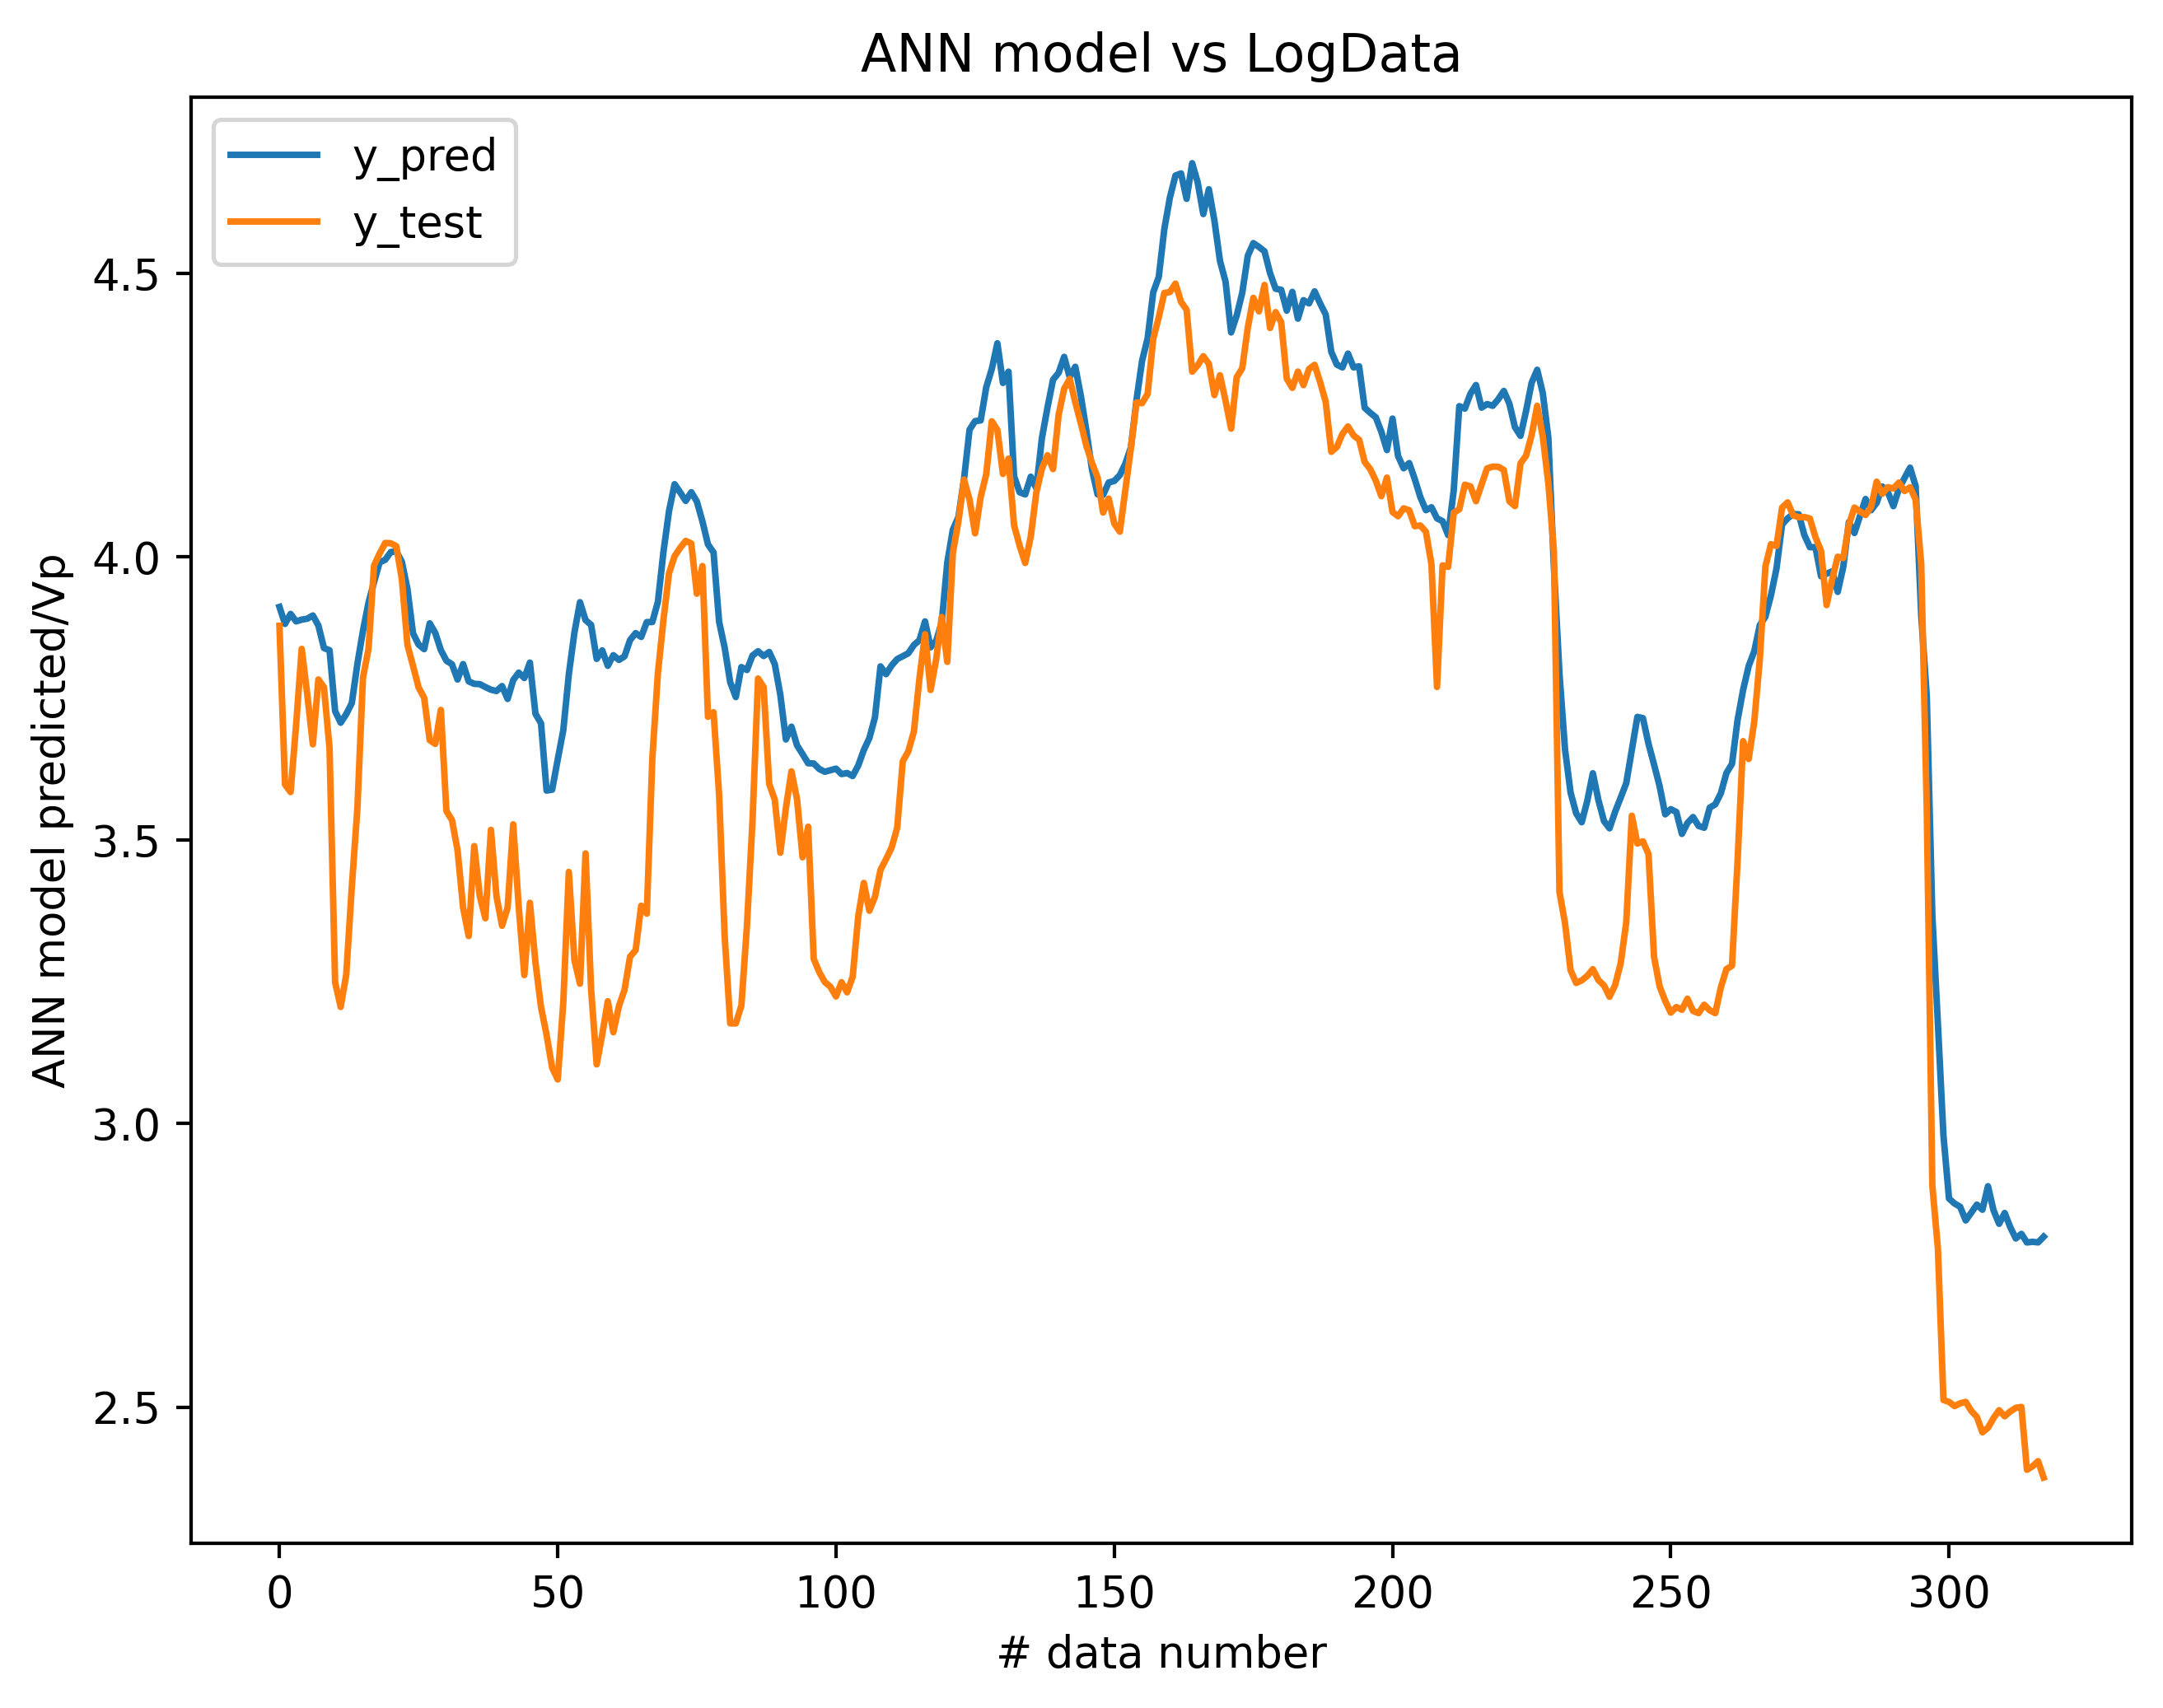

In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=380)

plt.plot(y_test_orig)
plt.plot(Predictions)


#plt.title('ANN model vs Balistic Model with Wind Horizontal Range')
plt.title('ANN model vs LogData')
plt.ylabel('ANN model predicted/Vp')
plt.xlabel('# data number')
plt.legend(['y_pred', 'y_test'], loc='upper left')
plt.show()



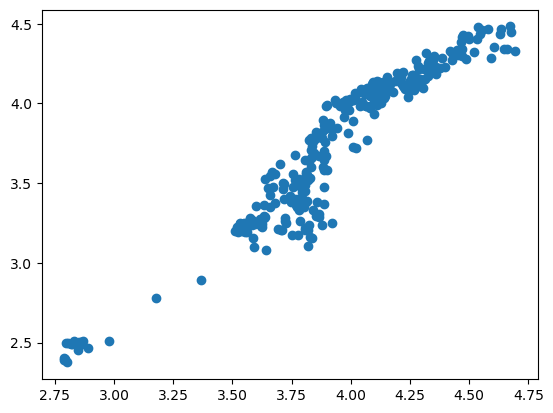

In [35]:
plt.scatter(y_test_orig, Predictions)

# Model accuracy analysis

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_no= mean_squared_error(y_test,model.predict(X_test))
r2_no= r2_score(y_test,model.predict(X_test))

10/10 [==============================] - 0s 914us/step


In [37]:
print('Mean Square Error       :',mse_no)
print('R2 Score                :',r2_no)


Mean Square Error       : 0.5420143789213647
R2 Score                : 0.5494008544238314


In [38]:
# list all data in history
print(history.history.keys())

dict_keys(['loss'])


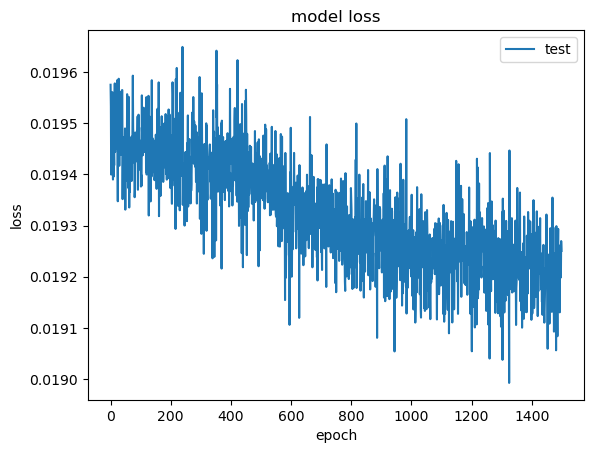

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()

In [40]:
# Using the lesson of Task 2, we will generate Linear regression between model prediction and true data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regr = LinearRegression()
regr.fit(y_test_orig,Predictions)
y_pred = regr.predict(y_test_orig)

print ("coefficients : ",regr.coef_[0][0])   #Slope
print ("Intercept : ",regr.intercept_[0])    #Intercept

print('R_Squared:', r2_score(y_test_orig, y_pred))


coefficients :  1.2144472643545634
Intercept :  -1.0460053980965096
R_Squared: 0.6895659776811733


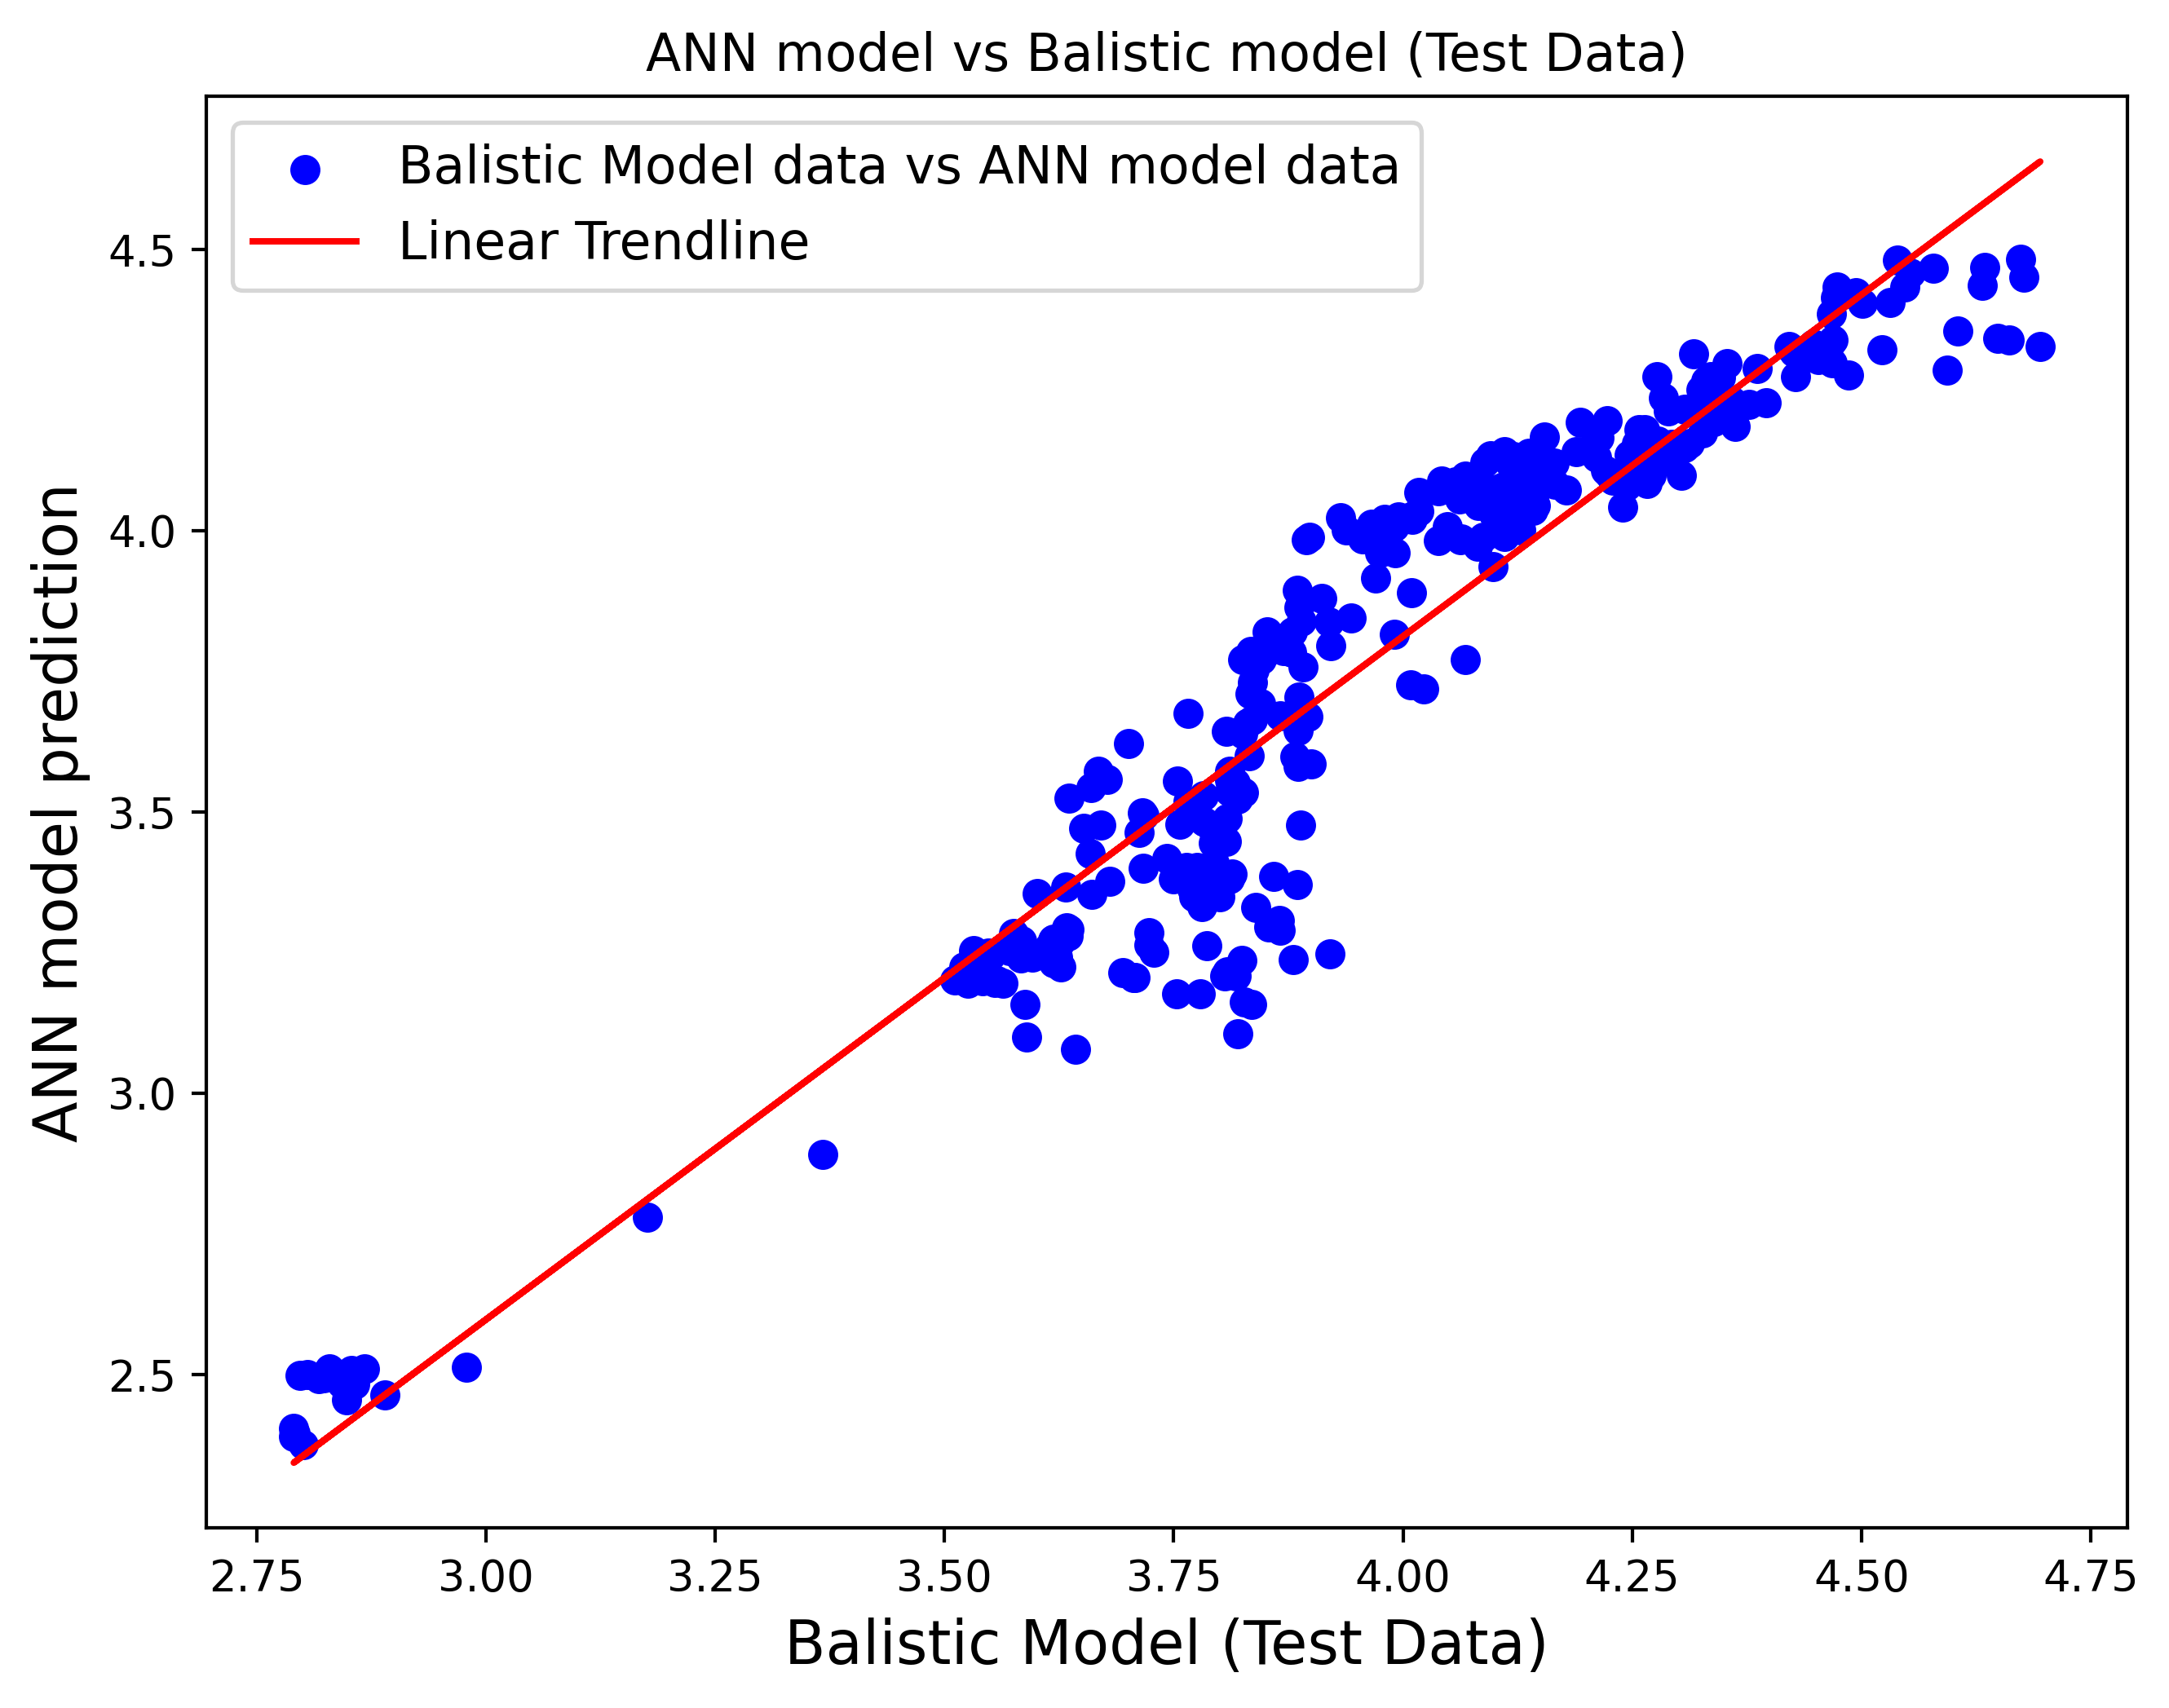

In [41]:
# Here we will plot both the scatter and the line plots

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=380)

# Scatter plot of the true and the prediction obtained from ANN
plt.scatter(y_test_orig, Predictions,color='blue')


# Line plot obtained from the true and predicted from the true using linearRegression

## Result for '' R''
plt.plot(y_test_orig,   regr.coef_[0][0]*y_test_orig  + regr.intercept_[0], '-r')


## Result for ''Time''
#plt.plot(y_test_orig,   1.0077*y_test_orig  -0.0741, '-r')


plt.title('ANN model vs Balistic model (Test Data)')
plt.ylabel('ANN model prediction',fontsize=14)
#plt.xlabel('Measurement(Training Data)',fontsize=14)
plt.xlabel('Balistic Model (Test Data)',fontsize=14)
plt.legend(['Balistic Model data vs ANN model data', 'Linear Trendline'], loc='upper left', fontsize=12)


plt.show()


# Conclusion

    Results show that ANN predict the test dataset with the accuracy of R_Squared: 0.999934923476118

    


# Your task #2

    Change the file from balistic to your cleandedoutlier or filtered one
    
    Then, do the modeling works according to the report hand in-format